
# ===Import Dependencies===


In [67]:
import torch
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import h5py
import numpy as np
import os
#import wget
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
import random
from PIL import Image as im
#import shutil


# ===Set Paths and Variables===


In [63]:
DATA_PATH ="C:/Users/Mohamme/Desktop/Masters/data"
IMAGES_PATH= os.path.join(DATA_PATH,"FULL_DATA")
TRAIN_PATH= os.path.join(DATA_PATH,"TRAIN")
TEST_PATH= os.path.join(DATA_PATH,"TEST")

#data_size=1



# ===Download Astronomy Image Dataset from Link===


In [68]:

DOWNLOAD_PATH = "C:/Users/Mohamme/Desktop/Masters/data/Galaxy10_DECals.h5"
#if not os.path.isfile(DOWNLOAD_PATH):
    #wget.download("https://www.astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5", DOWNLOAD_PATH)

with h5py.File(DOWNLOAD_PATH, 'r') as f: # open the files with h5py format
    images = np.array(f['images'])
    labels = np.array(f['ans']) # 0 for class 1 till 9 to class10

In [69]:
classes=[]
for i in range(10):
    classes.append(galaxy10cls_lookup(i))
print(classes)
print(len(images))


['Disturbed', 'Merging', 'Round Smooth', 'Smooth, Cigar shaped', 'Cigar Shaped Smooth', 'Barred Spiral', 'Unbarred Tight Spiral', 'Unbarred Loose Spiral', 'Edge-on without Bulge', 'Edge-on with Bulge']
17736


# ===Visualize galaxy images===


C:\Users\Mohamme\AppData\Local\Temp\ipykernel_4608\3390391572.py:7: UserWarning: The figure layout has changed to tight


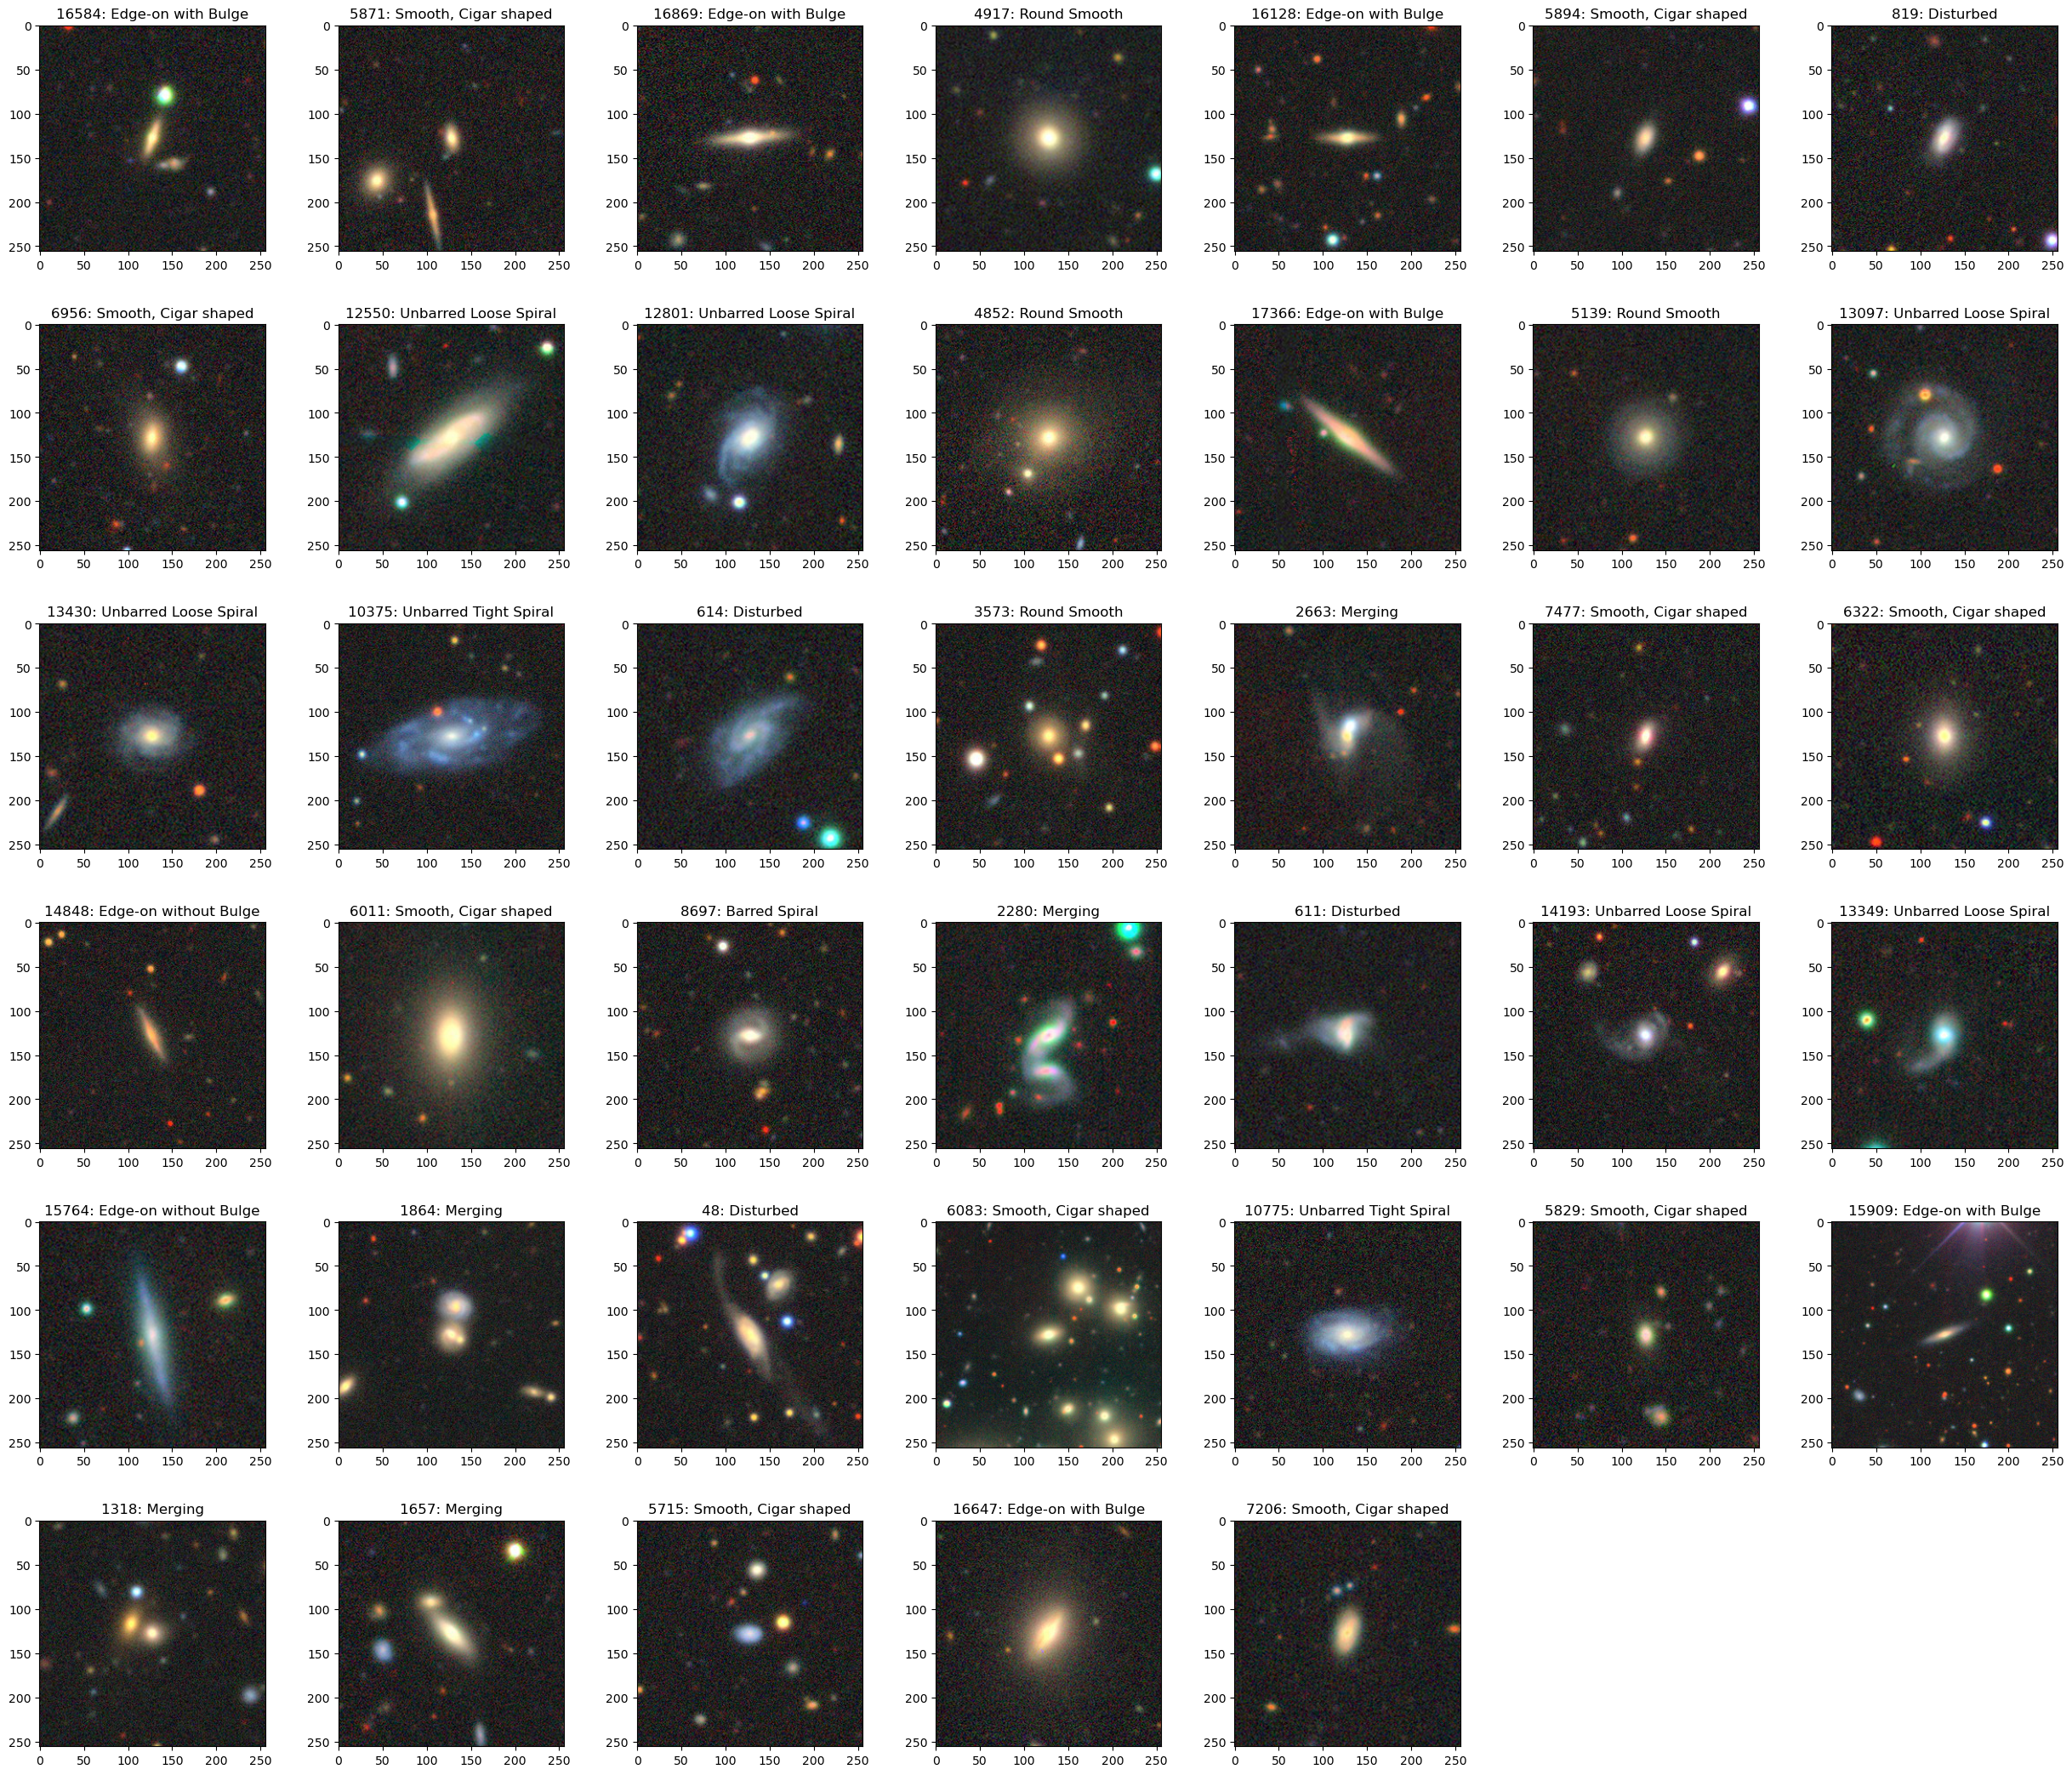

In [70]:
fig = plt.figure(figsize=(25,25)) 
for i in range(40):
    num = random.randrange(0, len(images)) #random number from 0 till 1700ish the images number
    plt.subplot(7,7,i+1)    
    plt.imshow(images[num])
    plt.title(str(num) + ": " + classes[labels[num]] )
    fig.tight_layout(pad=3.0)
    
plt.show()




16555: Edge-on with Bulge


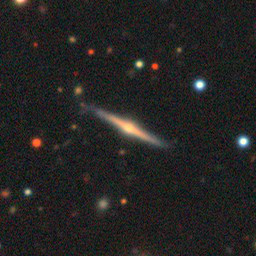

In [71]:
rand = random.randrange(0, len(images)) #gets random galaxy image

numpy_image = images[rand]
PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')
print(str(rand) + ": " + classes[labels[rand]])

PIL_image



# ===Create Folders for Data===

In [64]:
os.mkdir(IMAGES_PATH)
os.mkdir(TRAIN_PATH)
os.mkdir(TEST_PATH)


In [65]:
for i in classes: #10C
    os.mkdir(os.path.join(IMAGES_PATH,str(i)))
    os.mkdir(os.path.join(TRAIN_PATH,str(i)))
    os.mkdir(os.path.join(TEST_PATH,str(i)))

In [66]:
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((classes, counts)).T)

[['Disturbed' '1081']
 ['Merging' '1853']
 ['Round Smooth' '2645']
 ['Smooth, Cigar shaped' '2027']
 ['Cigar Shaped Smooth' '334']
 ['Barred Spiral' '2043']
 ['Unbarred Tight Spiral' '1829']
 ['Unbarred Loose Spiral' '2628']
 ['Edge-on without Bulge' '1423']
 ['Edge-on with Bulge' '1873']]



# ===Save images to folders created===


In [72]:
def save_all_images(images, labels):
    for i in range(len(images)): # ~17739
        label = classes[labels[i]] #return the label of the image i
        image = Image.fromarray(images[i].astype('uint8'), 'RGB')
        image = image.save(os.path.join(IMAGES_PATH, label, str(i) + ".jpg")) # saves each image into its subfolder 
        
        
    
    subfolders = []
    for subdir, dirs, files in os.walk(IMAGES_PATH):
        subfolders.append(subdir)
    
    subfolders = subfolders[1:] #excludes main directory from subdirectory list
    for i in subfolders:
        lst = os.listdir(i)
        train_images, test_images= train_test_split(lst, test_size=0.2)
        path, label = os.path.split(i)
        for train in train_images:
            image = im.open(f"{i}" + "/" + train)
            image = image.save(os.path.join(TRAIN_PATH, label, train))
        for test in test_images:
            image = im.open(f"{i}" + "/" + test)
            image = image.save(os.path.join(TEST_PATH, label, test))
    #shutil.rmtree(IMAGES_PATH)
# save_all_images(images, labels)

In [73]:
 save_all_images(images, labels)

In [84]:
print(classes[labels[0]])

Disturbed
